In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
result = pd.read_csv('rsi_backtest_results.csv')

In [3]:
result['RSI_Lower'] = result['RSI'].apply(lambda x: int(x.split('/')[0]))
result['RSI_Upper'] = result['RSI'].apply(lambda x: int(x.split('/')[1]))
result['RSI_Band'] = result['RSI'].apply(lambda x: x)

In [4]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

In [5]:
def set_plot_properties(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)
    return ax

Summary by RSI Bands:
     RSI  Final P&L     Win%  # Trades     ROI%
0  10/90    975.000  33.8950       534  15.4650
1  20/80  -5009.375  32.3525      1500  11.6775
2  30/70  -3759.375  34.4325      3254  15.9425

Summary by Timeframe:
  Timeframe    Final P&L    Win%  # Trades       ROI%
0    3 mins -4485.416667  30.155      3365   7.473333
1    5 mins  -710.416667  36.965      1923  21.250000

Summary by Risk-Reward Ratio:
  Risk:Reward    Final P&L       Win%  # Trades       ROI%
0         1:1 -6027.083333  36.316667      2717  36.316667
1         1:2   831.250000  30.803333      2571  -7.593333

Best Performing Strategy:
RSI: 10/90, Timeframe: 5 mins, Risk:Reward: 1:2
P&L: 9312.5, Win%: 37.5, ROI%: 12.5

Worst Performing Strategy:
RSI: 30/70, Timeframe: 3 mins, Risk:Reward: 1:1
P&L: -12325.0, Win%: 35.13, ROI%: 35.13


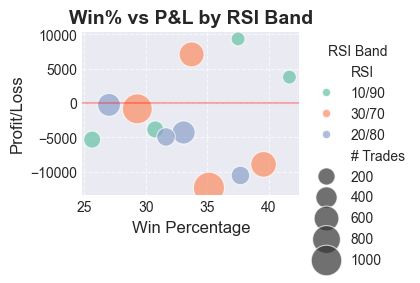

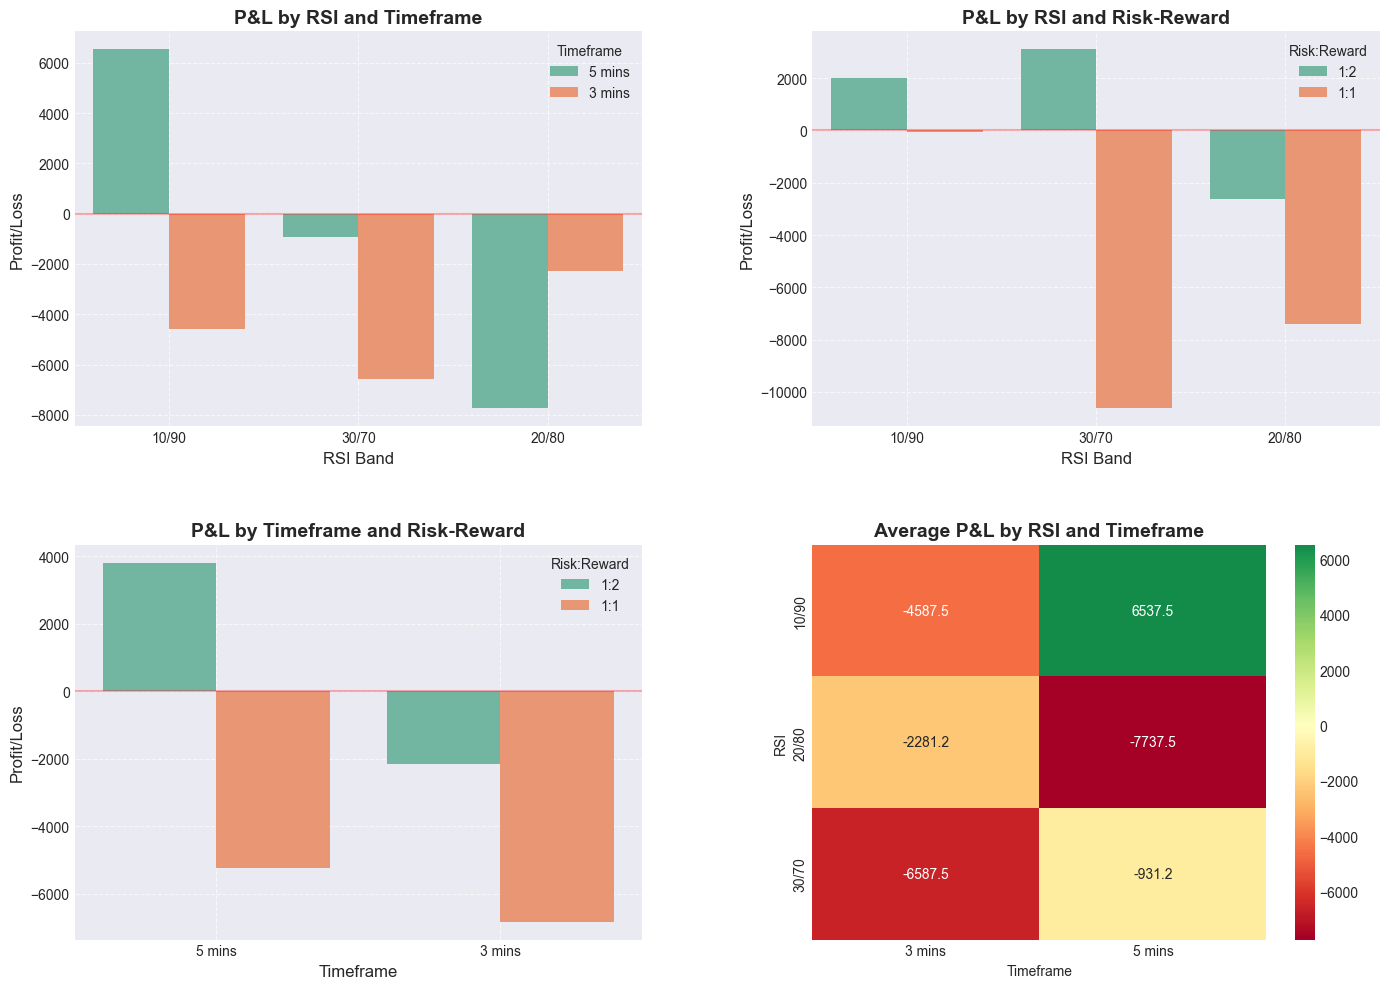

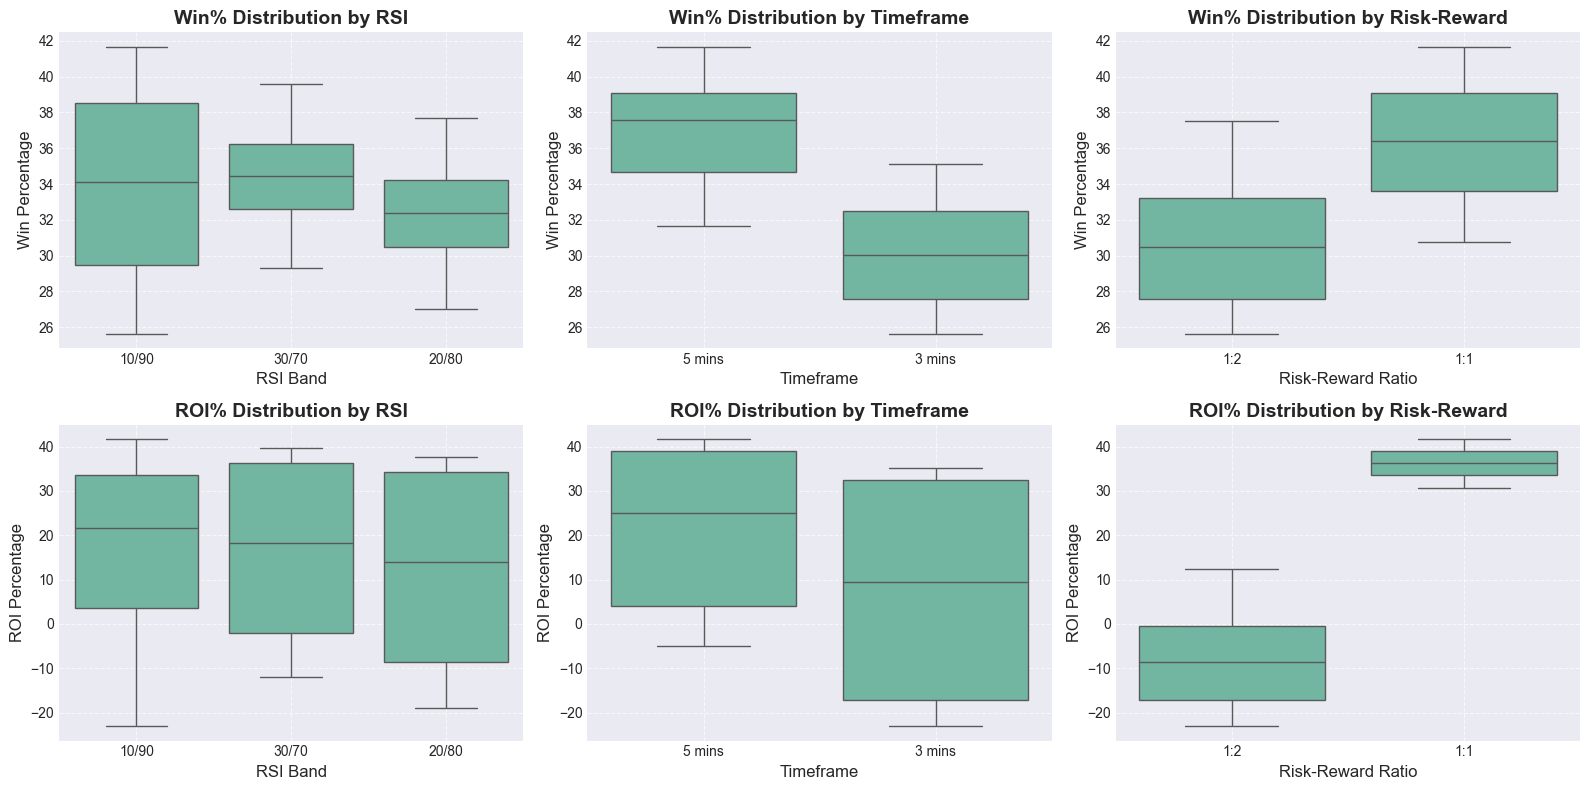

In [6]:
ax4 = plt.subplot(224)
scatter = sns.scatterplot(x='Win%', y='Final P&L', hue='RSI', size='# Trades',
                           sizes=(100, 500), alpha=0.7, data=result, ax=ax4)
set_plot_properties(ax4, 'Win% vs P&L by RSI Band', 'Win Percentage', 'Profit/Loss')
ax4.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax4.legend(title='RSI Band', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Create another figure with more detailed comparisons
plt.figure(figsize=(14, 10))

# 5. Combined impact of RSI and Timeframe on P&L
ax5 = plt.subplot(221)
sns.barplot(x='RSI', y='Final P&L', hue='Timeframe', data=result, ax=ax5, errorbar=None)
set_plot_properties(ax5, 'P&L by RSI and Timeframe', 'RSI Band', 'Profit/Loss')
ax5.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax5.legend(title='Timeframe')

# 6. Combined impact of RSI and Risk-Reward on P&L
ax6 = plt.subplot(222)
sns.barplot(x='RSI', y='Final P&L', hue='Risk:Reward', data=result, ax=ax6, errorbar=None)
set_plot_properties(ax6, 'P&L by RSI and Risk-Reward', 'RSI Band', 'Profit/Loss')
ax6.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax6.legend(title='Risk:Reward')

# 7. Combined impact of Timeframe and Risk-Reward on P&L
ax7 = plt.subplot(223)
sns.barplot(x='Timeframe', y='Final P&L', hue='Risk:Reward', data=result, ax=ax7, errorbar=None)
set_plot_properties(ax7, 'P&L by Timeframe and Risk-Reward', 'Timeframe', 'Profit/Loss')
ax7.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax7.legend(title='Risk:Reward')

# 8. Heatmap of average P&L by RSI and Timeframe
ax8 = plt.subplot(224)
pivot_table = pd.pivot_table(result, values='Final P&L', index='RSI', columns='Timeframe', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='RdYlGn', center=0, ax=ax8)
ax8.set_title('Average P&L by RSI and Timeframe', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Additional analysis: Create a summary DataFrame with aggregated metrics
# Group by the main factors we want to compare
rsi_summary = result.groupby('RSI').agg({
    'Final P&L': 'mean',
    'Win%': 'mean',
    '# Trades': 'sum',
    'ROI%': 'mean'
}).reset_index()

timeframe_summary = result.groupby('Timeframe').agg({
    'Final P&L': 'mean',
    'Win%': 'mean',
    '# Trades': 'sum',
    'ROI%': 'mean'
}).reset_index()

risk_reward_summary = result.groupby('Risk:Reward').agg({
    'Final P&L': 'mean',
    'Win%': 'mean',
    '# Trades': 'sum',
    'ROI%': 'mean'
}).reset_index()

# Create a figure for boxplots to show the distribution
plt.figure(figsize=(16, 8))

# 9. Win Percentage Distribution by RSI
ax9 = plt.subplot(231)
sns.boxplot(x='RSI', y='Win%', data=result, ax=ax9)
set_plot_properties(ax9, 'Win% Distribution by RSI', 'RSI Band', 'Win Percentage')

# 10. Win Percentage Distribution by Timeframe
ax10 = plt.subplot(232)
sns.boxplot(x='Timeframe', y='Win%', data=result, ax=ax10)
set_plot_properties(ax10, 'Win% Distribution by Timeframe', 'Timeframe', 'Win Percentage')

# 11. Win Percentage Distribution by Risk-Reward
ax11 = plt.subplot(233)
sns.boxplot(x='Risk:Reward', y='Win%', data=result, ax=ax11)
set_plot_properties(ax11, 'Win% Distribution by Risk-Reward', 'Risk-Reward Ratio', 'Win Percentage')

# 12. ROI Percentage Distribution by RSI
ax12 = plt.subplot(234)
sns.boxplot(x='RSI', y='ROI%', data=result, ax=ax12)
set_plot_properties(ax12, 'ROI% Distribution by RSI', 'RSI Band', 'ROI Percentage')

# 13. ROI Percentage Distribution by Timeframe
ax13 = plt.subplot(235)
sns.boxplot(x='Timeframe', y='ROI%', data=result, ax=ax13)
set_plot_properties(ax13, 'ROI% Distribution by Timeframe', 'Timeframe', 'ROI Percentage')

# 14. ROI Percentage Distribution by Risk-Reward
ax14 = plt.subplot(236)
sns.boxplot(x='Risk:Reward', y='ROI%', data=result, ax=ax14)
set_plot_properties(ax14, 'ROI% Distribution by Risk-Reward', 'Risk-Reward Ratio', 'ROI Percentage')

plt.tight_layout()

# Print summary tables
print("Summary by RSI Bands:")
print(rsi_summary)
print("\nSummary by Timeframe:")
print(timeframe_summary)
print("\nSummary by Risk-Reward Ratio:")
print(risk_reward_summary)

# Find the best and worst performing strategies
best_strategy = result.loc[result['Final P&L'].idxmax()]
worst_strategy = result.loc[result['Final P&L'].idxmin()]

print("\nBest Performing Strategy:")
print(f"RSI: {best_strategy['RSI']}, Timeframe: {best_strategy['Timeframe']}, Risk:Reward: {best_strategy['Risk:Reward']}")
print(f"P&L: {best_strategy['Final P&L']}, Win%: {best_strategy['Win%']}, ROI%: {best_strategy['ROI%']}")

print("\nWorst Performing Strategy:")
print(f"RSI: {worst_strategy['RSI']}, Timeframe: {worst_strategy['Timeframe']}, Risk:Reward: {worst_strategy['Risk:Reward']}")
print(f"P&L: {worst_strategy['Final P&L']}, Win%: {worst_strategy['Win%']}, ROI%: {worst_strategy['ROI%']}")